# Laboratorio 4 - Regresión Multivariada

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(0) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


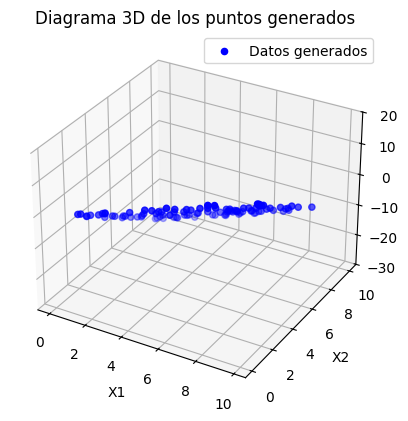

In [2]:
m = 100  # Número de datos de entrenamiento

# Generar datos aleatorios para x1 y x2
x1 = np.random.rand(m) * 10  # Valores aleatorios entre 0 y 10
x2 = np.random.rand(m) * 10  # Valores aleatorios entre 0 y 10

# Definir la ecuación para y
y = 2.1 * x1 - 3.1 * x2

# Crear un diagrama 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o', label="Datos generados")

# Etiquetas y título
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Diagrama 3D de los puntos generados")

# Mostrar la gráfica
plt.legend()
plt.show()

Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [3]:
Theta = np.random.rand(3)

print("Valores iniciales de Theta:", Theta)

Valores iniciales de Theta: [0.31179588 0.69634349 0.37775184]


3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [4]:
X = np.vstack([np.ones(m), x1, x2])  # Dimensiones (n+1, m) = (3, 100)

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

In [5]:
# Paso 4: Definir la función de coste
def compute_cost(X, Y, Theta):
    h = Theta.T @ X  # Calcula h = Θ^T X (dimensión (1, m))
    Lambda = h - Y  # Diferencia (h - Y)
    Lambda_sq = Lambda ** 2  # (h - Y)^2
    J = (1 / (2 * m)) * np.sum(Lambda_sq)  # Coste J
    return J

5. Aplicar el gradiente descendente: 
  - Encontrar el gradiente.
    $\nabla J$ = \Lambda X.T
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 

In [6]:
# Parámetros para gradiente descendente
alpha = 0.01  # Tasa de aprendizaje
iterations = 1000  # Número de iteraciones

# Paso 6: Aplicar el gradiente descendente y optimizar los parámetros
for i in range(iterations):
    h = Theta.T @ X  # Predicción h = Θ^T X
    Lambda = h - y  # Diferencia (h - Y)
    gradient = (1 / m) * (Lambda @ X.T)  # Gradiente: ∇J = Λ X.T
    Theta = Theta - alpha * gradient  # Actualización de Θ

    # Calcular y mostrar el coste cada 100 iteraciones
    if i % 100 == 0:
        cost = compute_cost(X, y, Theta)
        print(f"Iteración {i}: Coste = {cost}")

# Resultados finales
print("Parámetros optimizados Theta:", Theta)

Iteración 0: Coste = 54.60115120617125
Iteración 100: Coste = 0.0004343035538909009
Iteración 200: Coste = 0.0003364822089147182
Iteración 300: Coste = 0.0002611221617597269
Iteración 400: Coste = 0.00020264008484883797
Iteración 500: Coste = 0.00015725591313588892
Iteración 600: Coste = 0.00012203618170930367
Iteración 700: Coste = 9.47044174632612e-05
Iteración 800: Coste = 7.34939963003752e-05
Iteración 900: Coste = 5.7033955087624366e-05
Parámetros optimizados Theta: [ 0.02626717  2.09791788 -3.10247973]


Como se observa, el programa halló valores óptimos de $\Theta$ muy cercanos a los reales.